# Исследование объявлений о продаже квартир


### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Откроем данные по квартирам, используя разделитель.

In [1]:
import pandas as pd
estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
estate_data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Массив данных содержит описание 23699 квартир, описанных 22 параметрами. 17 из них выраженны как количественные, 3 - как качественные, 2 как булевы. В данных содержится много пропущенных значений.
Описание данных
total_images — число фотографий квартиры в объявлении
last_price — цена на момент снятия с публикации
total_area — площадь квартиры в квадратных метрах (м²)
first_day_exposition — дата публикации
rooms — число комнат
ceiling_height — высота потолков (м)
floors_total — всего этажей в доме
living_area — жилая площадь в квадратных метрах(м²)
floor — этаж
is_apartment — апартаменты (булев тип)
studio — квартира-студия (булев тип)
open_plan — свободная планировка (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
balcony — число балконов
locality_name — название населённого пункта
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
cityCenters_nearest — расстояние до центра города (м)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)

### Шаг 2. Предобработка данных

Найдем дупликаты.

In [3]:
estate_data.duplicated().sum()

0

Полных дупликатов в нашем массиве данных нет. Рассмотрим сначала самое простое - пропущенные данные в стобиках, где данные должны быть булевы по условию.
В наших данных это is_apartment,open_plan,studio. Проаущенные значения наблюдаются только в is_apartment. 

In [4]:
estate_data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Аппартаменты - не настолько распространенный тип жилья, поэтому вполне возможно, что пропущеные значения - нулевые.

In [5]:
estate_data['is_apartment']=estate_data['is_apartment'].fillna(False)
estate_data['is_apartment'].isnull().sum()

0

Данные приведены в формат булевых. 
Приведем дату в необходимый нам формат. Уберем значения по времени, так как они нам всё равно не дают никакой информации и равны нулю.

In [6]:
estate_data['first_day_exposition']= pd.to_datetime(estate_data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
estate_data['year_exposition']=estate_data['first_day_exposition'].dt.year
estate_data['month_exposition']=estate_data['first_day_exposition'].dt.month
estate_data['weekday_exposition']=estate_data['first_day_exposition'].dt.weekday
estate_data['first_day_exposition']=estate_data['first_day_exposition'].dt.date 

estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6,1


In [7]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Рассмотрим данные по этажности. В целом и средняя, и медиана довольно близки, и располагаютя на уровне 9-10 этажей. Однако, модальное значение находится в районе 5 этажей. В целом, учитывая, что основной советский жилой фонд состоял из зданий 5 и 9 этажей, распределение похоже на правду, но не дает нам ответа, какие данные вставлять на место пропущенных.

In [8]:
estate_data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

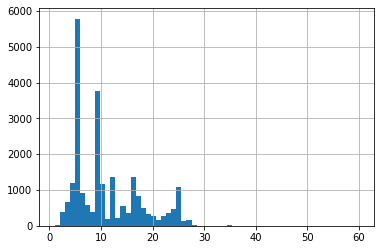

In [9]:
estate_data['floors_total'].hist(bins=60)

In [10]:
estate_data.query('floors_total=="NaN"')['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
21     4
5      4
7      4
11     3
10     3
1      3
13     3
15     3
18     3
19     3
14     2
20     2
2      2
24     2
23     1
17     1
22     1
Name: floor, dtype: int64

Кроме того, среди пропущенных значений много значений выше среднего. Нельзя жить на этаже, выше этажности своего дома. Поэтому самым оптимальным решением в данной ситуации будет приравнять значения столбца с высотностью дома значению этажа.Но до этого, создадим столбец со значениями типов этажей - первый, последний и другой. Неизвестные значения поместим в категорию "Другой"

In [11]:
def floor_type(row):
    floor=row['floor']
    last_floor=row['floors_total']
    if floor==last_floor:
        return 'Последний'
    if floor==1:
        return 'Первый'
    else:
        return 'Другой'
estate_data['floor_type']=estate_data.apply(floor_type, axis=1)
estate_data['floor_type'].value_counts()

Другой       17446
Последний     3361
Первый        2892
Name: floor_type, dtype: int64

In [12]:
estate_data.loc[estate_data['floors_total'].isna(), 'floors_total']=estate_data.loc[estate_data['floors_total'].isna(), 'floor']
estate_data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Данные изменены, и не повлияли на основные статистики.
Рассмотрим данные по потолкам. Есть как чрезмерно маленькие, так и чрезмерно большие. Меньше человеческого роста всего 3, они не сильно влияют на картину. Много данных в районе 20-30 метров похожи на опечатки. Заменим их похожими значениям, сдвинув запятую влево, через словарь.

In [13]:
estate_data.query('ceiling_height<2')['ceiling_height'].value_counts()

1.20    1
1.00    1
1.75    1
Name: ceiling_height, dtype: int64

In [14]:
estate_data.query('ceiling_height>5')['ceiling_height'].value_counts()

27.0     8
25.0     7
8.0      3
32.0     2
5.3      2
20.0     1
24.0     1
26.0     1
5.5      1
14.0     1
22.6     1
5.8      1
27.5     1
100.0    1
10.3     1
5.6      1
8.3      1
5.2      1
6.0      1
Name: ceiling_height, dtype: int64

In [15]:
wrong_right_dict={
    27: 2.7,
    20: 2,
    32: 3.2,
    25: 2.5,
    24: 2.4,
    26: 2.6,
    22.6: 2.26,
    27.5: 2.75,
    100:10.0
}
def wrong_right(wrong):
    height=wrong['ceiling_height']
    if height in wrong_right_dict:
        return wrong_right_dict[height]
    return height
estate_data['ceiling_height'] = estate_data.apply(wrong_right,axis=1)
estate_data.query('ceiling_height>5')['ceiling_height'].value_counts()

8.0     3
5.3     2
5.8     1
10.3    1
5.2     1
8.3     1
5.6     1
10.0    1
6.0     1
14.0    1
5.5     1
Name: ceiling_height, dtype: int64

Непонятно больших значений стало меньше и они не так сильно влияют на общую статистику. Рассчитаем медиану по зданиям с разной этажностью. Этот параметр выберем потому, что этажность обычно связана с разными строительными нормами, которые обычно распространяются и на высоту потолков. Так мы видим, что в шестиэтажных зданиях медианная высота потолка выше, чем в пятиэтажных.

In [16]:
estate_data['ceiling_height'].value_counts()
estate_data.pivot_table(index='floors_total',values='ceiling_height',aggfunc='median')


,ceiling_height
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55
6.0,3.00
7.0,3.00
8.0,2.80
9.0,2.55


In [17]:
def null_to_median (first,second):
    median_data=estate_data.groupby(first)[second].median()
    unique=estate_data[first].unique()
    for name in unique:
        median=median_data[name]
        estate_data.loc[estate_data[first]==name,second]=estate_data.loc[estate_data[first]==name,second].fillna(median)
null_to_median ('floors_total','ceiling_height')
estate_data['ceiling_height'].isnull().sum()
  

1

Не заменилось только одно значение. Посмотрим, в чем причина.

In [18]:
estate_data[estate_data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type
11575,9,9900000.0,101.0,2016-04-28,3,NaN,33.0,53.0,32,False,...,20444.0,0.0,NaN,3.0,80.0,53.0,2016,4,3,Другой


In [19]:
estate_data[estate_data['floors_total']==33]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type
11575,9,9900000.0,101.0,2016-04-28,3,NaN,33.0,53.0,32,False,...,20444.0,0.0,NaN,3.0,80.0,53.0,2016,4,3,Другой


Причина в том, что нет данных по зданиям с этим количеством этажей, поэтому заменим на медиану по всему массиву.

In [20]:
estate_data.loc[estate_data['ceiling_height'].isnull(),'ceiling_height']=estate_data['ceiling_height'].median()

In [21]:
estate_data[estate_data['floors_total']==33]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type
11575,9,9900000.0,101.0,2016-04-28,3,2.65,33.0,53.0,32,False,...,20444.0,0.0,NaN,3.0,80.0,53.0,2016,4,3,Другой


In [22]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Чтобы понять, какими данными можно заполнить пустые значения по жилой и кухонной площадям, изучим таблицу корреляций. Наибольшая связь у жилой площади наблюдается с количеством комнат и общей площадью. У куханной площади есть зависимость в основном от общей площади. Чтобы заполнить недостающие значения посчитаем доли кухонь и жилой площади в общей площади.

In [23]:
estate_data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition
total_images,1.000000,0.104473,0.115352,0.099288,0.049842,0.011147,0.104780,0.031340,0.010532,-0.029303,...,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657,0.140411,0.005043,-0.010433
last_price,0.104473,1.000000,0.653675,0.363343,0.264131,-0.006993,0.566492,0.026576,0.026958,-0.025362,...,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146,-0.043089,0.002779,0.001550
total_area,0.115352,0.653675,1.000000,0.758344,0.352828,-0.075652,0.939537,-0.024754,0.029633,-0.072653,...,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675,-0.079912,0.004920,-0.004695
rooms,0.099288,0.363343,0.758344,1.000000,0.201052,-0.227227,0.845977,-0.150862,0.000399,-0.147286,...,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961,-0.055418,-0.004469,-0.004134
ceiling_height,0.049842,0.264131,0.352828,0.201052,1.000000,-0.034832,0.333153,-0.012888,0.082016,0.015314,...,-0.071239,-0.266533,0.199930,-0.060219,0.184709,-0.113904,0.096673,-0.051633,0.000324,-0.009959
floors_total,0.011147,-0.006993,-0.075652,-0.227227,-0.034832,1.000000,-0.169256,0.678109,-0.026292,0.069522,...,0.106875,0.019284,-0.252489,0.096972,-0.122960,0.039055,-0.052559,0.008409,0.015753,0.013187
living_area,0.104780,0.566492,0.939537,0.845977,0.333153,-0.169256,1.000000,-0.097210,0.026969,-0.056231,...,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454,-0.072696,-0.002483,-0.005605
floor,0.031340,0.026576,-0.024754,-0.150862,-0.012888,0.678109,-0.097210,1.000000,-0.013294,0.036940,...,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463,0.004915,0.019387,0.012347
is_apartment,0.010532,0.026958,0.029633,0.000399,0.082016,-0.026292,0.026969,-0.013294,1.000000,-0.003657,...,0.016470,0.003732,0.020767,-0.033410,0.023989,0.003357,0.015262,0.009413,0.002369,-0.009492
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.015314,0.069522,-0.056231,0.036940,-0.003657,1.000000,...,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476,0.011961,0.000976,-0.000843


In [24]:
def share(data):
    try:
        estate_data['living_share']= estate_data['living_area']/estate_data['total_area']
        estate_data['kitchen_share']= estate_data['kitchen_area']/estate_data['total_area']
    except:
        estate_data['living_share']=0
        estate_data['kitchen_share']=0
estate_data.apply(share,axis=1)
estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type,living_share,kitchen_share
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,2019,3,3,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,2018,12,1,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,2015,8,3,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,2015,7,4,Другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,2018,6,1,Другой,0.320000,0.410000


Заменим нулевые значения жилой и куханной площадей на общую площадь, домноженную на долю.

In [25]:
def null_to_share (first,second,third):
    estate_data_not_null=estate_data[estate_data[second]!=0]
    median_data=estate_data_not_null.groupby(first)[third].median()
    unique=estate_data_not_null[first].unique()
    for name in unique:
        median=median_data[name]
        estate_data.loc[(estate_data[first]==name)&(estate_data[second].isna()),second]=estate_data.loc[(estate_data[first]==name)&(estate_data[second].isna()),'total_area']*median
null_to_share ('rooms','living_area','living_share')
null_to_share ('rooms','kitchen_area','kitchen_share')
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

По кухням не все данные изменены. Изучим их по-подробнее.

In [26]:
estate_data[estate_data['kitchen_area'].isna()].groupby('studio')['rooms'].value_counts()

studio  rooms
False   0         59
True    0        138
Name: rooms, dtype: int64

Мы видим, что нулевые значения по куханной площади достигаются у студий. Этот ноль логичен, потому что студии не имеют куханной площади. Однако, есть еще 59 значений не студий, но при этом с нулем комнат. Изучим их поподробнее

In [27]:
estate_data[(estate_data['rooms']==0)&(estate_data['studio']==False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type,living_share,kitchen_share
349,4,2320000.0,25.00,2017-09-27,0,2.60,14.0,17.000000,1,False,...,NaN,NaN,NaN,45.0,2017,9,2,Первый,0.680000,NaN
508,0,3375000.0,34.40,2017-03-28,0,2.66,26.0,24.300000,19,False,...,NaN,1.0,593.0,430.0,2017,3,1,Другой,0.706395,NaN
780,9,2600000.0,26.10,2018-02-20,0,2.70,18.0,18.000000,8,False,...,NaN,NaN,NaN,45.0,2018,2,1,Другой,NaN,NaN
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.000000,3,False,...,NaN,NaN,NaN,7.0,2017,4,4,Другой,0.428571,NaN
946,5,2200000.0,23.00,2016-09-27,0,2.70,27.0,18.000000,7,False,...,NaN,NaN,NaN,483.0,2016,9,1,Другой,0.782609,NaN
1574,0,2200000.0,22.00,2017-11-03,0,2.70,18.0,15.000000,16,False,...,NaN,NaN,NaN,81.0,2017,11,4,Другой,0.681818,NaN
1625,7,1980000.0,23.98,2018-02-01,0,3.00,4.0,10.500000,3,False,...,NaN,NaN,NaN,120.0,2018,2,3,Другой,0.437865,NaN
2532,5,3500000.0,27.10,2018-02-01,0,2.70,18.0,18.700000,9,False,...,NaN,1.0,644.0,70.0,2018,2,3,Другой,0.690037,NaN
3019,18,2100000.0,24.00,2017-11-10,0,2.60,10.0,18.000000,6,False,...,NaN,NaN,NaN,5.0,2017,11,4,Другой,0.750000,NaN
4115,7,2600000.0,24.00,2018-02-01,0,2.75,25.0,18.000000,4,False,...,915.0,0.0,NaN,42.0,2018,2,3,Другой,0.750000,NaN


В целом, глядя на общую площадь, можно утверждать, что это ошибка разметки данных и эти квартиры являются студиями. Обновим данные по ним в таблице. Оставим только непонятное значение квартиры с нулем комнат и 371 метров площади. Это либо отклонение, либо информация по количеству комнат заполнена неверно.

In [28]:
estate_data.loc[(estate_data['rooms']==0)&(estate_data['studio']==False)&(estate_data['total_area']<50),'studio']=True
def fillna_0(column):
    estate_data[column]=estate_data[column].fillna('0')
fillna_0('kitchen_area')
estate_data['kitchen_area']=estate_data['kitchen_area'].astype('float')
estate_data[(estate_data['rooms']==0)&(estate_data['studio']==False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type,living_share,kitchen_share
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7.0,255.862069,6,False,...,761.0,1.0,584.0,90.0,2018,7,3,Другой,NaN,NaN


Нулевые значения по балконам тоже вполне естественны. Заполних и их нулями. То же самое повторим с парками и водоемами в радиусе 3 км, предполоив что при отсутствии данных их нет в принципе.

Повторим функцию, чтобы заполнить оставшиеся пропущенные значения в добавочных столбиках.

In [29]:
estate_data.apply(share,axis=1)
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type,living_share,kitchen_share
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000,8,False,...,482.0,2.0,755.0,NaN,2019,3,3,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.600,1,False,...,NaN,0.0,NaN,81.0,2018,12,1,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.300,4,False,...,90.0,2.0,574.0,558.0,2015,8,3,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,100.435,9,False,...,84.0,3.0,234.0,424.0,2015,7,4,Другой,0.631667,0.128571
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000,13,False,...,112.0,1.0,48.0,121.0,2018,6,1,Другой,0.320000,0.410000


In [30]:
fillna_0('balcony')
fillna_0('parks_around3000')
fillna_0('ponds_around3000')
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null object
parks_nearest           8079 non-null float64
ponds_around3000  

Рассмотрим данные, которые остались незаполнены. Отсутствие данных по населенному пункту мы не можем заполнить никаким средним или медианным значением. Можно только поспекулировать и по уровню цен определить, но этих данных не так много, поэтому лучше просто не учитывать в дальнейшем.Что касается ближайшего аэропорта и растояния до центра города, то по данным ниже видно, что отсутствующие значения выпадают в основном на посёлки и пригород, что говорит о том, что они не учитываются из-за дальности. Заполнять их тоже нет смысла. Ближайшие парки и пруды отсутствуют скорее всего из-за отсутствия или большой дальности. Если мы вставим значение 0, то оно будет считаться как очень маленькое расстояние, поэтому лучше оставить пропуски.

Приведем значения в столбцу с названием населенного пункта к единному виду. Так как тип населенного пункта нам не нужен для анализа, удалим его, упростив и внешний вид данных, и анализ.

In [31]:
estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [32]:
def delete_type(data):
    name=""
    type_locality=['поселок','посёлок','станции','деревня','городского','типа','садовое','товарищество','городской','село','коттеджный','при', 'железнодорожной','садоводческое','некоммерческое']
    for word in data.split():
        if word in type_locality:
            name+=''
        else:
            name+=word
        name+=' '
    return name.strip()
estate_data['locality_name']=estate_data.loc[estate_data['locality_name'].notnull(),'locality_name'].apply(delete_type)
estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [33]:
estate_data.loc[estate_data['airports_nearest'].isna(),'locality_name'].value_counts()

Мурино              588
Кудрово             472
Всеволожск          398
Гатчина             307
Выборг              237
                   ... 
Гладкое               1
Пчева                 1
Рапполово             1
Старое Хинколово      1
Тёсово-4              1
Name: locality_name, Length: 286, dtype: int64

In [34]:
estate_data.loc[estate_data['airports_nearest'].isna(),'locality_name'].unique()

array(['Янино-1', 'Мурино', 'Сертолово', 'Кудрово', 'Коммунар',
       'Красный Бор', 'Гатчина', 'Фёдоровское', 'Выборг', 'Кировск',
       'Новое Девяткино', 'Санкт-Петербург', 'Лебяжье', 'Сиверский',
       'Молодцово', 'Кузьмоловский', 'Новая Ропша', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Куттузи',
       'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи',
       'Первомайское', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры',
       'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Тихвин', 'Победа', 'Нурма', 'Синявино',
       'Шушары', 'Тосно', 'Бокситогорск', 'Лопухинка', 'Пикалёво',
       'Терволово', 'Советский', 'Подпорожье', 'Петровское', 'Токсово',
       'Сельцо', 'Вырица', 'Кипень', 'Келози', 'Вартемяги', 'Тельмана',
       'Севастьяново', 'Большая Ижо

In [35]:
estate_data.loc[estate_data['cityCenters_nearest'].isna(),'locality_name'].value_counts()

Мурино                588
Кудрово               472
Всеволожск            398
Гатчина               307
Выборг                237
                     ... 
Гладкое                 1
Кирпичное               1
Форт Красная Горка      1
Дружноселье             1
Колпино                 1
Name: locality_name, Length: 287, dtype: int64

In [36]:
estate_data.loc[estate_data['cityCenters_nearest'].isna(),'locality_name'].unique()

array(['Янино-1', 'Мурино', 'Сертолово', 'Кудрово', 'Коммунар',
       'Красный Бор', 'Гатчина', 'Фёдоровское', 'Выборг', 'Кировск',
       'Новое Девяткино', 'Санкт-Петербург', 'Лебяжье', 'Сиверский',
       'Молодцово', 'Кузьмоловский', 'Новая Ропша', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Куттузи',
       'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи',
       'Первомайское', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры',
       'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Тихвин', 'Победа', 'Нурма', 'Синявино',
       'Шушары', 'Тосно', 'Бокситогорск', 'Лопухинка', 'Пикалёво',
       'Терволово', 'Советский', 'Подпорожье', 'Петровское', 'Токсово',
       'Сельцо', 'Вырица', 'Кипень', 'Келози', 'Вартемяги', 'Тельмана',
       'Севастьяново', 'Большая Ижо

Переведем данные в формат int64,так как многие из них всё равно содержат целочисленные значении. Или копейки при таком уровне цен на квартиры нам не интересны, но без них данные выглядят аккуратнее. Округлим рассчитанные данные, чтобы выглядело аккуратнее, но при этом не терялись данные

In [37]:
estate_data['kitchen_area']=estate_data['kitchen_area'].astype('float')
change_to_int=['last_price','floors_total','balcony','parks_around3000','ponds_around3000']
change_round=['living_area','kitchen_area','living_share','kitchen_share']
for name in change_to_int:
    estate_data[name]=estate_data[name].astype('int')
for name in change_round:
    estate_data[name]=estate_data[name].apply(lambda x: round(x, 4))

estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000        

In [38]:
estate_data[estate_data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type,living_share,kitchen_share
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0000,8,False,...,482.0,2,755.0,NaN,2019,3,3,Другой,0.4722,0.2315
7,5,7915000,71.60,2019-04-18,2,2.75,24,41.8867,22,False,...,NaN,0,NaN,NaN,2019,4,3,Другой,0.5850,0.2640
44,13,5350000,40.00,2018-11-18,1,2.75,22,19.2995,3,False,...,620.0,1,1152.0,NaN,2018,11,6,Другой,0.4825,0.2478
45,17,5200000,50.60,2018-12-02,2,2.65,9,30.3000,7,False,...,NaN,0,NaN,NaN,2018,12,6,Другой,0.5988,0.1383
46,17,6600000,52.10,2019-01-31,2,2.60,24,29.7000,9,False,...,NaN,0,NaN,NaN,2019,1,3,Другой,0.5701,0.1593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000,145.00,2018-11-02,4,3.00,26,71.4000,17,False,...,NaN,0,NaN,NaN,2018,11,4,Другой,0.4924,0.1076
23685,15,2490000,31.00,2019-01-24,1,2.50,5,17.3000,5,False,...,NaN,0,NaN,NaN,2019,1,3,Последний,0.5581,0.1806
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3000,3,False,...,796.0,3,381.0,NaN,2017,3,1,Другой,0.5478,0.1034
23696,18,2500000,56.70,2018-02-11,2,2.80,3,29.7000,1,False,...,NaN,0,NaN,NaN,2018,2,6,Первый,0.5238,0.1611


Исследован массив данных.В булиевых переменных пропущенные значения замененены на нули, изменены на корректные (при нулевом количестве комнат и небольшой площади квартира объявлена студией). Пропущенное количество этажей в доме приравнено к этажу квартиры. По высоте потолков проставлена медиана в зависимости от этажей. Пропущенная жилая и кухонная площадь заполнена по медианным долям помещений с подобным количеством комнат. Числа балконов, парков, водоемов простравлены при отсутствии как нулевые.Что касается расстояний, то их решено оставить незаполненными, так как отсутствие похоже на слишком далекое расстояние, а заполнение исказит известные данные. Тип населенного пункта удален из столбика с названием для упрощения анализа. По пропущенному количеству дней размещения трудно что-то выяснить, поэтому тоже стоит оставить не заполнененным. Возможно, это так и не снятые или забытые объявления.

### Шаг 3. Посчитайте и добавьте в таблицу

Год, месяц и дату публикации объявления, а так же соотношение жилой и общей площади,отношение площади кухни к общей, и тип этажа мы выявили в предыдущем пункте. Посчитаем цену квадратного метра разделив цену на общую площадь квартиры.

In [39]:
estate_data['price_for_squere']=estate_data['last_price']/estate_data['total_area']
estate_data['price_for_squere']=estate_data['price_for_squere'].apply(lambda x: round(x, 2))
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type,living_share,kitchen_share,price_for_squere
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000,8,False,...,2,755.0,NaN,2019,3,3,Другой,0.4722,0.2315,120370.37
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600,1,False,...,0,NaN,81.0,2018,12,1,Первый,0.4604,0.2723,82920.79
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300,4,False,...,2,574.0,558.0,2015,8,3,Другой,0.6125,0.1482,92785.71
3,0,64900000,159.0,2015-07-24,3,2.60,14,100.435,9,False,...,3,234.0,424.0,2015,7,4,Другой,0.6317,0.1286,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000,13,False,...,1,48.0,121.0,2018,6,1,Другой,0.3200,0.4100,100000.00


Для облегчения дальнейшего изучения посчитана цена квадратного метра площади квартир, доля жилой и доля кухонной площади в общем метраже квартиры, и кроме того вынесены отдельным столбцом год, месяц и день недели размещения объявления.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим данные по площади. Распределение похоже на распределение Пуассона. Однако есть сильно выбивабщиеся значения, например 12 - это очень мало для квартиры, а 900 - явно единичный случай

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


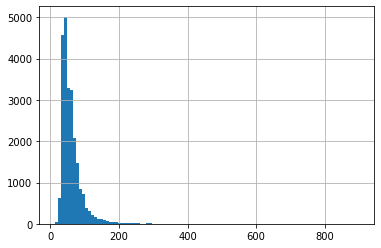

In [40]:
def research(data,column,bins_value):
    print(data[column].describe())
    data[column].hist(bins=bins_value)
research(estate_data,'total_area',100)

Изучим значения до 20 квадратных метров. Их достотчно много, похоже это просто небольшие квартиры, а не ошибка выборки

In [41]:
estate_data.query('total_area<20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type,living_share,kitchen_share,price_for_squere
716,5,1500000,17.00,2017-06-07,0,2.70,9,12.0000,1,False,...,0,NaN,40.0,2017,6,2,Первый,0.7059,0.0000,88235.29
4542,12,3300000,18.00,2018-11-07,1,3.50,5,9.0000,2,False,...,1,963.0,9.0,2018,11,2,Другой,0.5000,0.2478,183333.33
5855,3,945750,19.50,2017-09-18,0,2.76,3,12.7000,2,False,...,0,NaN,3.0,2017,9,0,Другой,0.6513,0.0000,48500.00
6084,6,770000,18.00,2017-10-16,1,2.55,5,13.0000,4,False,...,0,NaN,90.0,2017,10,0,Другой,0.7222,0.1667,42777.78
8454,7,2250000,19.00,2019-03-12,0,3.00,6,13.1034,2,False,...,3,374.0,44.0,2019,3,1,Другой,0.6897,0.0000,118421.05
8729,9,2200000,18.40,2018-08-20,1,2.52,3,14.0000,3,False,...,1,155.0,59.0,2018,8,0,Последний,0.7609,0.1304,119565.22
8755,1,1350000,18.80,2017-11-22,0,2.75,19,15.8000,1,False,...,1,1127.0,128.0,2017,11,2,Первый,0.8404,0.0000,71808.51
8886,10,2450000,15.50,2018-08-22,0,2.55,5,10.0000,2,False,...,1,446.0,27.0,2018,8,2,Другой,0.6452,0.0000,158064.52
9157,0,3400000,17.60,2018-03-18,1,2.55,5,15.0000,2,False,...,1,309.0,117.0,2018,3,6,Другой,0.8523,0.2478,193181.82
9412,5,2100000,16.00,2017-12-10,0,3.00,6,13.0000,1,False,...,3,72.0,3.0,2017,12,6,Первый,0.8125,0.0000,131250.00


Изучим значения больше 500 квадратных метров. Их гораздо меньше, и значение в 900 квадратных метров всё еще выбивается.

In [42]:
estate_data.query('total_area>500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,floor_type,living_share,kitchen_share,price_for_squere
3117,19,140000000,631.0,2019-03-30,7,2.55,5,430.1339,5,False,...,2,210.0,NaN,2019,3,5,Последний,0.6817,0.0951,221870.05
4237,1,50000000,517.0,2017-10-14,7,3.00,4,332.0000,3,False,...,2,540.0,NaN,2017,10,5,Другой,0.6422,0.0426,96711.80
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0000,3,False,...,0,NaN,14.0,2019,2,3,Другой,0.6932,0.1695,110169.49
8018,20,84000000,507.0,2015-12-17,5,4.45,7,301.5000,7,True,...,0,NaN,1078.0,2015,12,3,Последний,0.5947,0.0897,165680.47
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3000,4,False,...,2,210.0,NaN,2019,4,1,Последний,0.5106,0.0309,221799.75
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0000,5,False,...,2,198.0,111.0,2017,12,0,Другой,0.4175,0.1133,485436.89
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7000,25,False,...,2,318.0,106.0,2017,12,2,Последний,0.4552,0.1244,466666.67


В целом, основная часть недвижимости не больше 100 квадрадратных метров. Примерно до 150 еще есть небольшой хвост, а после - единичные значения, которые нам будут интересны только в рамках изучения элитного жилья.

Количество значений меньше 200 -  23468
Количество значений меньше 150 -  23117
Количество значений меньше 100 -  21791
count    23117.000000
mean        56.479872
std         22.817434
min         12.000000
25%         40.000000
50%         51.000000
75%         67.700000
max        149.600000
Name: total_area, dtype: float64


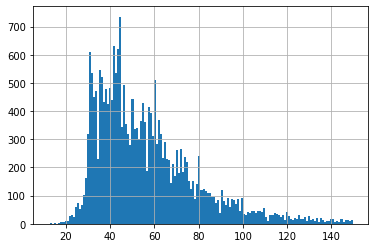

In [43]:
print('Количество значений меньше 200 - ',estate_data.query('total_area<200')['total_area'].count())
print('Количество значений меньше 150 - ',estate_data.query('total_area<150')['total_area'].count())
print('Количество значений меньше 100 - ',estate_data.query('total_area<100')['total_area'].count())
estate_good_data=estate_data.query('total_area<150')
research(estate_good_data,'total_area',150)

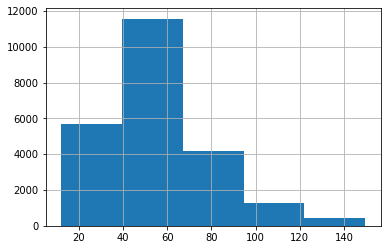

In [44]:
estate_good_data['total_area'].hist(bins=5)

Если укрупнить интервалы, то еще больше заметно, что около половины всех значений по площади лежат в интервале от 40 до 65 квадратных метров. Средняя площадь - 56,5, а медиана - 51.

Изучим показатель цены. По графику видно, что у него очень длиный хвост.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


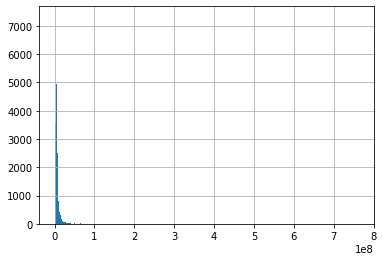

In [45]:
research(estate_data,'last_price',500)

Если брать значения, где убраны слишком большие значения по площади, график начнет больше напоминать распределение Пуассона. Однако хвост всё еще большой.

count    2.311700e+04
mean     5.685158e+06
std      4.502098e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.581000e+06
75%      6.500000e+06
max      1.240000e+08
Name: last_price, dtype: float64


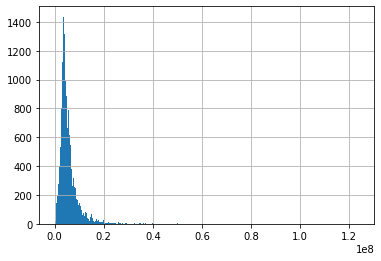

In [46]:
research(estate_good_data,'last_price',500)

По тому же принципу, как с площадью, отсечем слишком большие значения и изучим.Если брать значения по цене до 15 млн.рублей, то средняя цена сдвинется к 5,1 млн. рублям.

Количество значений меньше 20 миллионов рублей -  22777
Количество значений меньше 15 миллионов рублей -  22370
Количество значений меньше 10 миллионов рублей -  20908
count    2.237000e+04
mean     5.115205e+06
std      2.646419e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.250000e+06
max      1.500000e+07
Name: last_price, dtype: float64


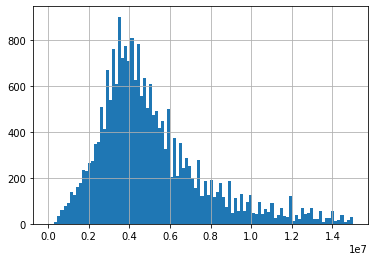

In [47]:
print('Количество значений меньше 20 миллионов рублей - ',estate_good_data.query('last_price<20000000')['last_price'].count())
print('Количество значений меньше 15 миллионов рублей - ',estate_good_data.query('last_price<15000000')['last_price'].count())
print('Количество значений меньше 10 миллионов рублей - ',estate_good_data.query('last_price<10000000')['last_price'].count())
estate_good_price_data=estate_good_data.query('last_price<15000000')
research(estate_good_price_data,'last_price',100)

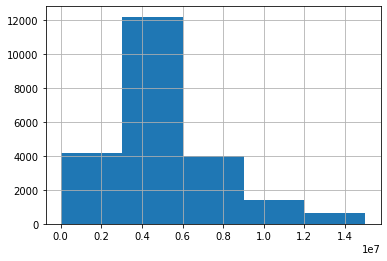

In [48]:
estate_good_price_data['last_price'].hist(bins=5)

В целом, основная часть квартир продается по цене меньше 9 млн.рублей . Примерно до 15 млн. рублей еще есть небольшой хвост, а после - единичные значения, которые нам будут интересны только в рамках изучения элитного жилья.
Если укрупнить интервалы, то еще больше заметно, что около половины всех значений по цене лежат в интервале от 3 до 6 миллионов рублей. Средняя цена - 5,11, а медиана - 4,5.

Изучим количество комнат.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


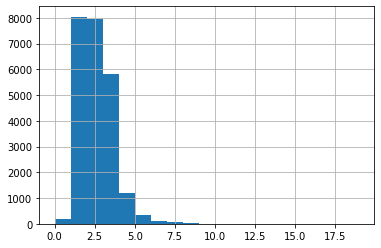

In [49]:
research(estate_data,'rooms',19)

count    22370.000000
mean         1.965087
std          0.930211
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


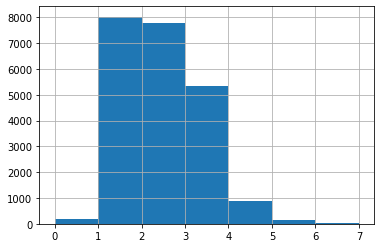

In [50]:
research(estate_good_price_data,'rooms',7)

При изучении всех данных у распределения Пуассона опять обнаружен достаточно большой хвост из данных. Но если брать отфильтрованные раннее данные без элитной недвижимости, то ненужный нам хвост пропадет, что довольно логично, потому что мы исключили данные с чрезмерным размером площади при тесной корреляцией этого признака с количеством комнат. Как видно из графика, на рынке Ленинградской области много однокомнатных и двухкомнатных квартир, и чуть меньше трехкомнатных. Остальные значения встречаются гораздо реже.

Изучим высоту потолков.

count    23699.000000
mean         2.709922
std          0.265343
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         14.000000
Name: ceiling_height, dtype: float64


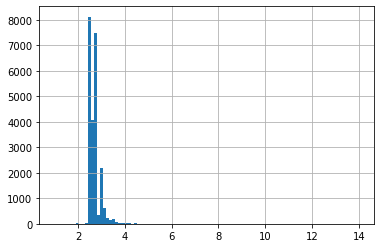

In [51]:
research(estate_data,'ceiling_height',100)

count    22370.000000
mean         2.690674
std          0.238497
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         14.000000
Name: ceiling_height, dtype: float64


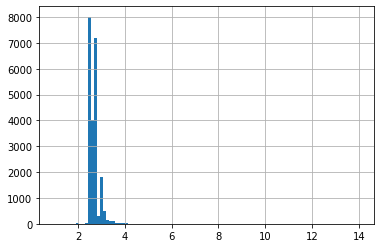

In [52]:
research(estate_good_price_data,'ceiling_height',100)

На графике опять заметны единичные выбросы, причем они не исчезают, если применять фильтрованную базу. Попробуем избавится от них так же, как выше, но при этом учитывая, что слишком низкими потолки тоже быть не могут.

Количество значений меньше 5 метров -  22361
Количество значений меньше 4 метров -  22315
Количество значений меньше 3 метров -  19626
Количество значений больше 2,4 метров -  22323
count    22268.000000
mean         2.686513
std          0.193555
min          2.450000
25%          2.550000
50%          2.650000
75%          2.750000
max          3.980000
Name: ceiling_height, dtype: float64


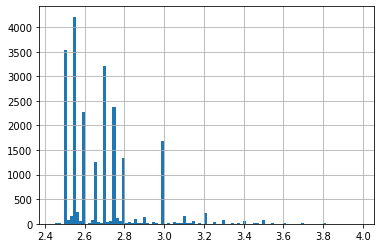

In [53]:
print('Количество значений меньше 5 метров - ',estate_good_price_data.query('ceiling_height<5')['ceiling_height'].count())
print('Количество значений меньше 4 метров - ',estate_good_price_data.query('ceiling_height<4')['ceiling_height'].count())
print('Количество значений меньше 3 метров - ',estate_good_price_data.query('ceiling_height<3')['ceiling_height'].count())
print('Количество значений больше 2,4 метров - ',estate_good_price_data.query('ceiling_height>2.4')['ceiling_height'].count())
estate_good=estate_good_price_data.query('ceiling_height<4 and ceiling_height>2.4')
research(estate_good,'ceiling_height',100)

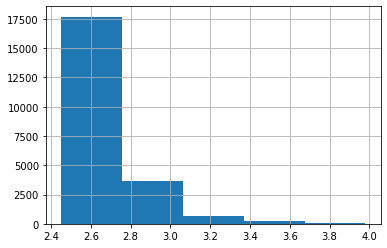

In [54]:
estate_good['ceiling_height'].hist(bins=5)

Среднее значение в результате отсечения слишком больших значений и слишком низких, не слишком изменилось и составило 2,69 метров.При укрупнении интервалов группировки заметно, что большинсто значений по высоте потолка лежит в интервале 2,5-2,75 метров.

Изучим, время продажи квартиры.

In [55]:
estate_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Получили среднюю - 180, которая заметно отклоняется от медианы - 95 дней. Построим график,чтобы определить, насколько силен разброс данных.

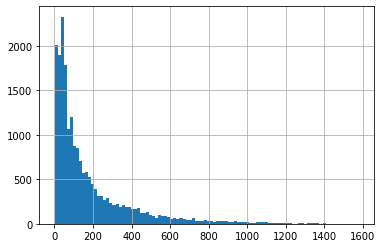

In [56]:
estate_data['days_exposition'].hist(bins=100)

Предположим, что если квартира продается больше года, то это слишком долго. При этом если квартира продана меньше, чем за неделю - это слишком быстро. Посмотрим, как изменяться данные.

Количество значений меньше 400 дней -  17873
Количество значений меньше 365 дней -  17457
Количество значений меньше 300 дней -  16585
Количество значений больше 7 дней -  19670
count    16609.000000
mean       109.842856
std         88.799796
min          8.000000
25%         44.000000
50%         81.000000
75%        160.000000
max        364.000000
Name: days_exposition, dtype: float64


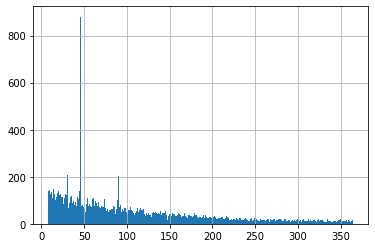

In [57]:
print('Количество значений меньше 400 дней - ',estate_data.query('days_exposition<400')['days_exposition'].count())
print('Количество значений меньше 365 дней - ',estate_data.query('days_exposition<365')['days_exposition'].count())
print('Количество значений меньше 300 дней - ',estate_data.query('days_exposition<300')['days_exposition'].count())
print('Количество значений больше 7 дней - ',estate_data.query('days_exposition>7')['days_exposition'].count())
estate_exp_good=estate_data.query('days_exposition<365 and days_exposition>7 and days_exposition!="Nan"')
estate_exp_good['days_exposition'].astype('int')
research(estate_exp_good,'days_exposition',365-7)

Медиана сдвинулась со значения 95 к 81 дням, при этом средняя сместилась от 180 к 109 дням. Рассмотрим более крупную группировку.

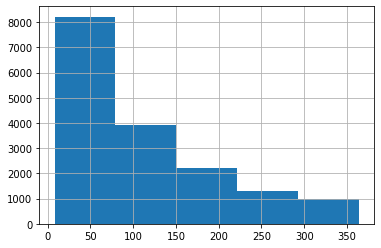

In [58]:
estate_exp_good['days_exposition'].hist(bins=5)

По ней видно, что половина квартир продается в течение примерно 75 дней. Это достаточно правдоподобный срок. Однако на более подробном график виден резкий скачок значений между 40 и 50. Изучим самые популярные значения.

In [59]:
estate_exp_good['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
30.0    208
90.0    204
14.0    148
9.0     143
8.0     139
20.0    139
44.0    138
11.0    135
Name: days_exposition, dtype: int64

Первые 4 значения подозрительно "круглые". Возможно, это связанно не сколько с тем, что за это время все успевают продать квартиры, а с тем, что существуют некоторые правила на сайте снятия объявления после 45 дней и 60 дней, и возможно 30 и 45 дней. Для дальнейших выводов лучше уточнить этот момент поподробнее.

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


count    14779.000000
mean       116.915894
std         91.519748
min          8.000000
25%         42.000000
50%         92.000000
75%        172.000000
max        364.000000
Name: days_exposition, dtype: float64


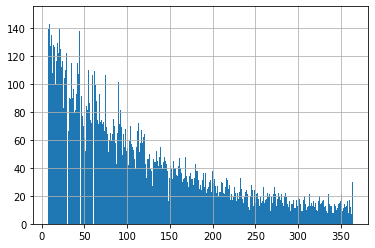

In [60]:
estate_exp_good.loc[estate_exp_good['days_exposition'].notnull(), 'days_exposition'] =estate_exp_good.loc[estate_exp_good['days_exposition'].notnull(), 'days_exposition'].astype('int')
estate_exp_very_good=estate_exp_good[~estate_exp_good['days_exposition'].isin(['30', '45', '60', '90'])]
research(estate_exp_very_good,'days_exposition',365-7-2)

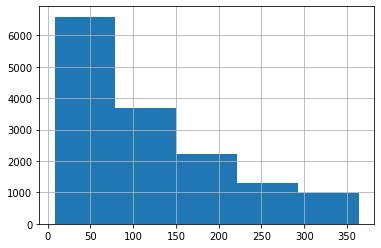

In [61]:
estate_exp_very_good['days_exposition'].hist(bins=5)

Таким образом, убрав выбивающиеся данные, мы получили среднее и медиану, которые примерно равны и находятся в районе 91-92 дней. То есть с момента размещения объявления на сайте до момента его снятия проходит около 3 месяца.

<div class="alert alert-block alert-success">
Нравится твоя структура исследования. Все последовательно и аккуратно
</div>
    
---

Изучим факторы, влияющие на цену

Признак total_area
Корреляция цены с признаком 0.7421808117137135
Признак rooms
Корреляция цены с признаком 0.47603937380908684
Признак cityCenters_nearest
Корреляция цены с признаком -0.35403224162649816
Признак year_exposition
Корреляция цены с признаком -0.014059901115774672
Признак month_exposition
Корреляция цены с признаком 0.0049045723366197115
Признак weekday_exposition
Корреляция цены с признаком -0.012919023355534185


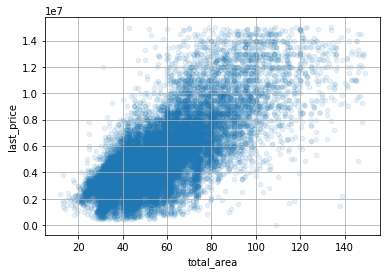

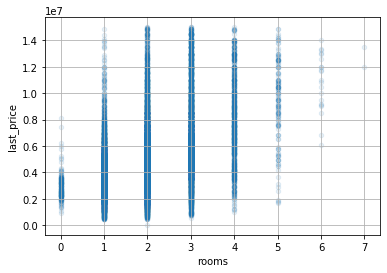

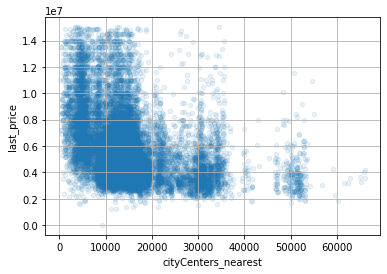

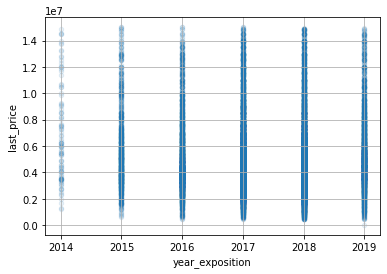

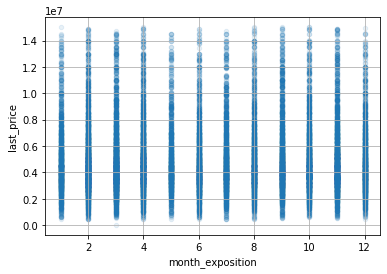

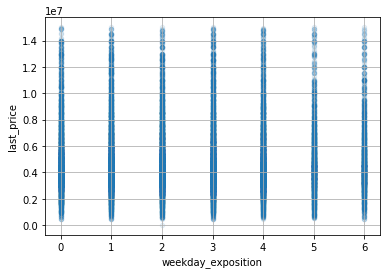

In [62]:
def find_correlation(data):
    factor_price=['total_area','rooms','cityCenters_nearest','year_exposition','month_exposition','weekday_exposition']
    for factor in factor_price:
        print('Признак', factor)
        data.plot(x=factor, y='last_price', kind='scatter', grid=True, alpha=0.1)
        print('Корреляция цены с признаком',data['last_price'].corr(data[factor]))
find_correlation(estate_good)

Изучим влияние типа этажа

In [63]:
estate_good.pivot_table(index='floor_type', columns=None, aggfunc={'last_price':'mean'})

,last_price
floor_type,
Другой,5.329914e+06
Первый,4.256493e+06
Последний,4.725152e+06


Самая низкая цена - на первом этаже, на последнем - чуть выше. Купить квартиру на другом этаже выйдет дороже всего.

In [64]:
def pivot(data,column):
    estate_pivot=data.pivot_table(index=column, columns=None, aggfunc={'last_price':'sum','total_area':'sum'})
    estate_pivot.columns = ['sum_price','sum_area']
    estate_pivot['squere_price']=estate_pivot['sum_price']/estate_pivot['sum_area']
    estate_pivot=estate_pivot.sort_values(by = 'squere_price',ascending = False)
    return estate_pivot

Связь цены с площадью квартирой самая сильная и прямая.
Зависимость цены от количества комнат не настолько сильно выражена и тоже прямая.
Связь цены с расстоянием от центра средняя и обратная.
Связь цены с годом, месяцем и днем недели объявления незначительна.

Найдем 10 населенных пунктов с наибольшим количеством объявлений. Отсортируем фильтрованный массив с хорошими данными и выведем среднюю цену по горадам с наибольшим количеством объявлений.

In [65]:
top_locality=estate_good['locality_name'].value_counts().head(10).index
estate_top10=estate_good.query('locality_name in @top_locality')
def pivot(data,column):
    estate_pivot=data.pivot_table(index=column, columns=None, aggfunc={'last_price':'sum','total_area':'sum'})
    estate_pivot.columns = ['sum_price','sum_area']
    estate_pivot['squere_price']=estate_pivot['sum_price']/estate_pivot['sum_area']
    estate_pivot=estate_pivot.sort_values(by = 'squere_price',ascending = False)
    return estate_pivot
pivot(estate_top10,'locality_name')

,sum_price,sum_area,squere_price
locality_name,,,
Санкт-Петербург,86735047245,816315.41,106251.880318
Пушкин,1923461964,19102.48,100691.740758
Кудрово,2053700760,21860.63,93945.177243
Парголово,1459700459,16646.00,87690.764087
Мурино,2170292700,26018.37,83413.861053
Шушары,1807555999,23681.36,76328.217594
Колпино,1299839246,17599.74,73855.593662
Гатчина,1065419360,15534.48,68584.166319
Всеволожск,1465036065,21954.41,66730.832894


Самые дорогие города для покупки квартиры - Санкт-Петербург, чуть дешевеле - Пушкин. Выборг,Всеволожск и Гатчина, наоборот, самые дешеевые.

In [66]:
piter_estate=estate_good.query('locality_name=="Санкт-Петербург"')
piter_estate['centr_km']=piter_estate['cityCenters_nearest']/1000
piter_estate['centr_km']=piter_estate['centr_km'].apply(lambda x: round(x, 0))
pivot(piter_estate,'centr_km')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sum_price,sum_area,squere_price
centr_km,,,
27.0,16600000,106.00,156603.773585
6.0,3597548602,29747.51,120936.125477
7.0,2233385389,18977.82,117683.979983
5.0,5634677211,47998.74,117392.190107
8.0,3639681995,31031.03,117291.691413
1.0,1114711999,9586.98,116273.529203
2.0,1828744000,16040.84,114005.500959
4.0,4501633788,40167.65,112071.126591
0.0,87980000,791.10,111212.236127


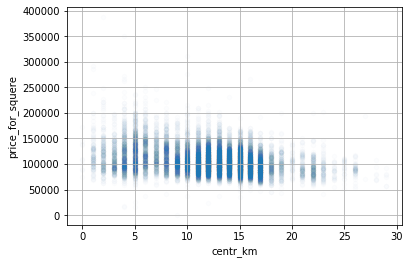

In [67]:
piter_estate.plot(x='centr_km', y='price_for_squere', kind='scatter', grid=True, alpha=0.01)

     Данные начинают меняться после зоны в 8 км. Значит в качестве центральной будет принята зона на расстоянии до 9 км от центра. Выделим их в отдельный сегмент и изучим.

Рассмотрим данные по цене площади квартир.

count    3111.000000
mean       69.144491
std        25.370000
min        12.000000
25%        48.800000
50%        66.500000
75%        85.150000
max       149.000000
Name: total_area, dtype: float64


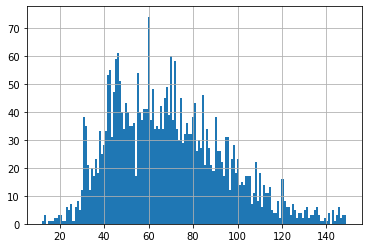

In [68]:
piter_centr_estate=piter_estate.query('centr_km<9')
research(piter_centr_estate,'total_area',150)

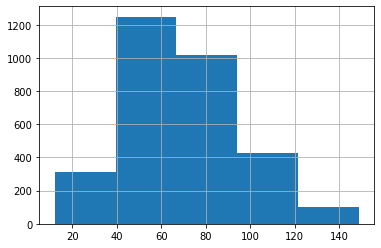

In [69]:
piter_centr_estate['total_area'].hist(bins=5)

Если укрупнить интервалы, то еще больше заметно, что около половины всех значений по площади лежат в интервале от 40 до 65 квадратных метров, как и в целом по области. Средняя площадь - 69, а медиана - 66, что выше данных по области (56,5 и 51 квадратных метров соответственно).

Изучим данные по цене.

count    3.111000e+03
mean     8.000744e+06
std      2.834966e+06
min      1.600000e+06
25%      5.850000e+06
50%      7.600000e+06
75%      9.900000e+06
max      1.499900e+07
Name: last_price, dtype: float64


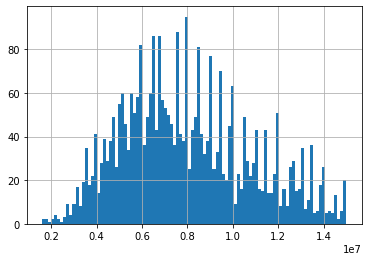

In [70]:
research(piter_centr_estate,'last_price',100)

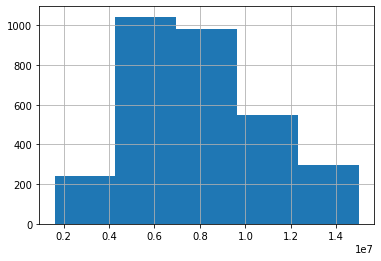

In [71]:
piter_centr_estate['last_price'].hist(bins=5)

В центе Санкт-Петербурга около половины всех значений по цене лежат в интервале от 4 до 10 миллионов рублей. Средняя цена однако значительно выше - 8 млн.рублей, а медиана - 7,6 млн.рублей. (5,11 и 4,5 миллионов рублей по области).

Изучим данные по количеству комнат.

count    3111.000000
mean        2.395371
std         1.056855
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64


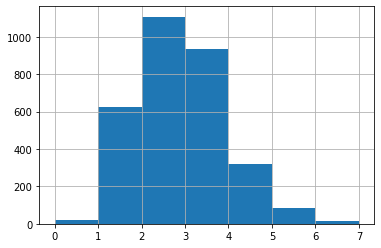

In [72]:
research(piter_centr_estate,'rooms',7)

Как видно из графика, на рынке в центре Санкт-Питербурга много двухкомнатных и трехкомнатных квартир, и чуть меньше однокомнатных.Остальные значения встречаются гораздо реже. Средняя и медиана в районе 2 комнатных квартир совпадает с областью.

Изучим данные по высоте потолков.

count    3111.000000
mean        2.894031
std         0.296314
min         2.450000
25%         2.650000
50%         2.850000
75%         3.000000
max         3.980000
Name: ceiling_height, dtype: float64


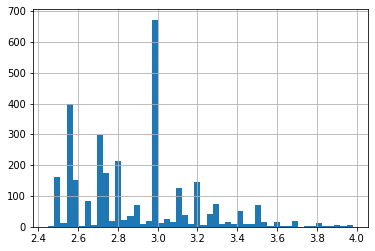

In [73]:
research(piter_centr_estate,'ceiling_height',50)

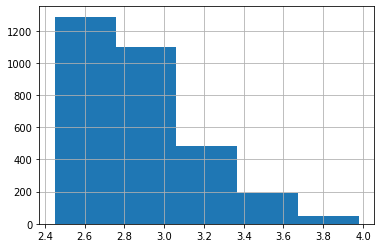

In [74]:
piter_centr_estate['ceiling_height'].hist(bins=5)

Среднее значение составило 2,89 метров при медиане 2,85 метра( в общих данных 2,69 и 2,65 м соответственно). Разница значительна.
Большинсто значений по высоте потолка лежит в интервале 2,45-2,75 метров.

Признак total_area
Корреляция цены с признаком 0.7263355693284161
Признак rooms
Корреляция цены с признаком 0.4934828456190308
Признак cityCenters_nearest
Корреляция цены с признаком -0.18298504093249196
Признак year_exposition
Корреляция цены с признаком -0.04020361784744482
Признак month_exposition
Корреляция цены с признаком -0.02127386549628216
Признак weekday_exposition
Корреляция цены с признаком 0.004165729631299431


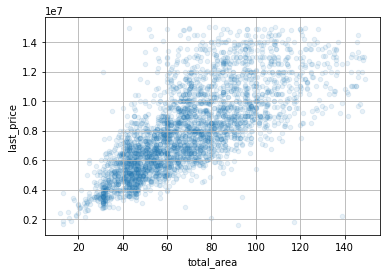

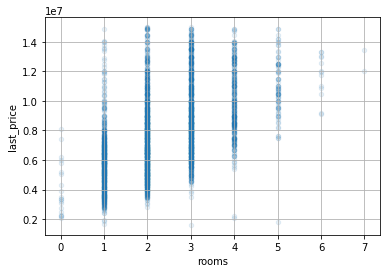

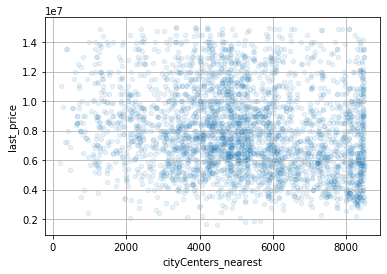

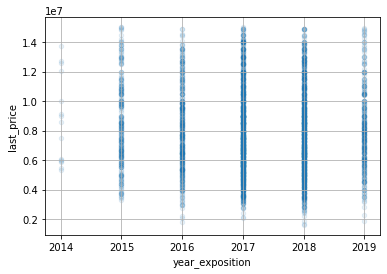

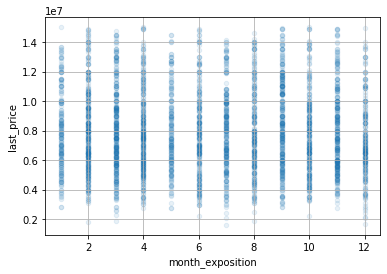

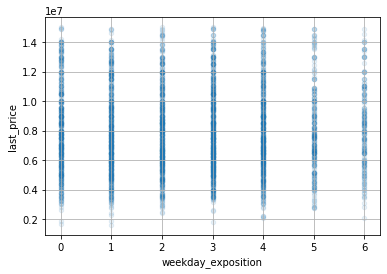

In [75]:
find_correlation(piter_centr_estate)

Связь цены с площадью квартирой самая сильная и прямая, менее выражена, чем в целом по области.
Зависимость цены от количества комнат не настолько сильно выражена и тоже прямая. Выражена сильнее, чем по области.
Связь цены с расстоянием от центра слабая и обратная.
Связь цены с годом, месяцем и днем недели объявления незначительна.

In [76]:
piter_centr_estate.pivot_table(index='floor_type', columns=None, aggfunc={'last_price':'mean'})

,last_price
floor_type,
Другой,8.226725e+06
Первый,6.673514e+06
Последний,8.044410e+06


Последний этаж в центре города не настолько отличается по стоимости от других этажей, зато первый сильно дешевле.

В целом, можно отметить, что жилой фонд центра Санк-Петербурга отличается от всего жилого фонда по области. Можно предположить, что основную его часть составляет довольно старая застройка, в то время как область больше застраивалась в 20-21 веке. Кроме того, из-за того, что мы использовали фильтрацию по фактору, влияющему на стоимость, очень заметна разница этой самой стоимости по сравнению со средним по области.

### Шаг 5. Общий вывод

Данные по объявлениям в Ленинградской области были приведены к виду, удобному для анализа. Пропущенные значения по возможности заполнены, а отклоняющиеся - исключены. 
Выявленно, что средняя площадь квартир составляет 56-57 квадратных метров, но в центре Санкт-Петербурга - 69 квадратных метра, основной объем рынка составляют однокомнатные и двухекомнатные квартиры с потолком около 2,7 метра, но в центре Санкт-Петербурга больше многокомнатных квартир с потолками в среднем на 20 см выше. Самое значительное различие центра Санкт-Петербурга в цене - 8 миллионов против 5,11 миллионов в среднем по области. Что не удивительно, потому что мы выяснили, что Санкт-Петербург - самый дорогой город в области.
Выяснили, что в среднем продажа квартиры происходит за 3 месяца, а основными факторами, которые влияют на цену квартиры являются общая площадь, количество комнат и расстояние от центра. Причем связь с первыми двумя факторами прямая, а с последним - обратная. Квартиру по-дешевле проще найти на первом этаже, особенно в центре Санкт-Петербурга.